In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv('C:/Users/Admin/Downloads/movies_dataset.csv')
data.head()

,Unnamed: 0,User_Id,Movie_Name,Rating,Genre
0,0,1,Pulp Fiction (1994),5.0,Comedy|Crime|Drama|Thriller
1,1,1,Three Colors: Red (Trois couleurs: Rouge) (1994),3.5,Drama
2,2,1,Three Colors: Blue (Trois couleurs: Bleu) (1993),5.0,Drama
3,3,1,Underground (1995),5.0,Comedy|Drama|War
4,4,1,Singin' in the Rain (1952),3.5,Comedy|Musical|Romance


In [32]:
data.shape

(25000095, 4)

## Exploratory Data Analysis

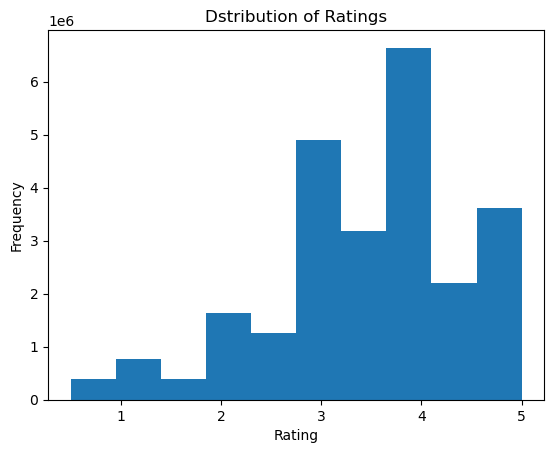

In [7]:
plt.hist(data['Rating'])

# Add labels and title
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Dstribution of Ratings')

# Show the plot
plt.show()

In [8]:
data = data.drop('Unnamed: 0', axis=1)

In [9]:
subset = data.iloc[0:1_000_000]

In [10]:
subset.shape

(1000000, 4)

In [11]:
subset.head()

,User_Id,Movie_Name,Rating,Genre
0,1,Pulp Fiction (1994),5.0,Comedy|Crime|Drama|Thriller
1,1,Three Colors: Red (Trois couleurs: Rouge) (1994),3.5,Drama
2,1,Three Colors: Blue (Trois couleurs: Bleu) (1993),5.0,Drama
3,1,Underground (1995),5.0,Comedy|Drama|War
4,1,Singin' in the Rain (1952),3.5,Comedy|Musical|Romance


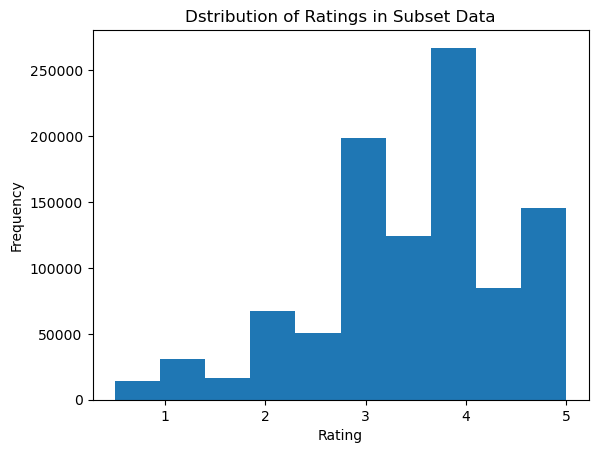

In [12]:
plt.hist(subset['Rating'])

# Add labels and title
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Dstribution of Ratings in Subset Data')

# Show the plot
plt.show()

In [13]:
# Extract all unique genres
all_genres = set()
for genres in data['Genre']:
    all_genres.update(genres.split('|'))

# Print all unique genres
print("Set of all genres available in the dataset: ")
print(all_genres)

Set of all genres available in the dataset: 
{'(no genres listed)', 'Crime', 'Musical', 'Children', 'Fantasy', 'Film-Noir', 'Documentary', 'Romance', 'IMAX', 'Action', 'Horror', 'Thriller', 'Drama', 'Comedy', 'Sci-Fi', 'Animation', 'Mystery', 'Western', 'War', 'Adventure'}


In [14]:
# Extract all unique genres
all_genres = set()
for genres in subset['Genre']:
    all_genres.update(genres.split('|'))

# Print all unique genres
print("Set of all genres available in the subset dataset: ")
print(all_genres)

Set of all genres available in the subset dataset: 
{'(no genres listed)', 'Crime', 'Musical', 'Children', 'Fantasy', 'Film-Noir', 'Documentary', 'Romance', 'IMAX', 'Action', 'Horror', 'Thriller', 'Drama', 'Comedy', 'Sci-Fi', 'Animation', 'Mystery', 'Western', 'War', 'Adventure'}


- We have captured all the genres in the `subset` data from the whole `data`. 
- From the genres column we can also see there are invalid values in the `'Genre'` column which is `'(no genres listed)'`.

In [15]:
# Drop rows where genre is "(no genres listed)"
subset = subset[subset['Genre'] != '(no genres listed)']

Since some movies have more than one genre, we can create new columns in the data for each genre present in the `all_genres` set. These new columns will have binary values indicating whether a movie belongs to a particular genre or not.

In [16]:
all_genres = { 'Action', 'Adventure', 'Animation', 'Children', 'Comedy','Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
              'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'}

In [17]:
# Create new columns for each genre and assign values of 1 or 0
for genre in all_genres:
    subset[genre] = subset['Genre'].apply(lambda x: 1 if genre in x else 0)

In [18]:
subset.head()

,User_Id,Movie_Name,Rating,Genre,IMAX,Action,Horror,Thriller,Drama,Crime,...,Fantasy,Sci-Fi,Animation,Film-Noir,Mystery,Western,Documentary,War,Adventure,Romance
0,1,Pulp Fiction (1994),5.0,Comedy|Crime|Drama|Thriller,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,Three Colors: Red (Trois couleurs: Rouge) (1994),3.5,Drama,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,Three Colors: Blue (Trois couleurs: Bleu) (1993),5.0,Drama,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,Underground (1995),5.0,Comedy|Drama|War,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,1,Singin' in the Rain (1952),3.5,Comedy|Musical|Romance,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [67]:
# create a mapping of unique movie names to movie IDs
movies = subset["Movie_Name"].unique()
movie_to_id = {}
for i, movie in enumerate(movies):
    movie_to_id[movie] = i

# create the Movie_Id column based on the mapping
subset["Movie_Id"] = subset["Movie_Name"].map(movie_to_id)

In [68]:
subset.columns

Index(['User_Id', 'Movie_Name', 'Rating', 'Genre', 'IMAX', 'Action', 'Horror',
       'Thriller', 'Drama', 'Crime', 'Musical', 'Comedy', 'Children',
       'Fantasy', 'Sci-Fi', 'Animation', 'Film-Noir', 'Mystery', 'Western',
       'Documentary', 'War', 'Adventure', 'Romance', 'Release_Date',
       'Movie_Id'],
      dtype='object')

In [69]:
subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 998727 entries, 0 to 999999
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   User_Id       998727 non-null  int64         
 1   Movie_Name    998727 non-null  object        
 2   Rating        998727 non-null  float64       
 3   Genre         998727 non-null  object        
 4   IMAX          998727 non-null  int64         
 5   Action        998727 non-null  int64         
 6   Horror        998727 non-null  int64         
 7   Thriller      998727 non-null  int64         
 8   Drama         998727 non-null  int64         
 9   Crime         998727 non-null  int64         
 10  Musical       998727 non-null  int64         
 11  Comedy        998727 non-null  int64         
 12  Children      998727 non-null  int64         
 13  Fantasy       998727 non-null  int64         
 14  Sci-Fi        998727 non-null  int64         
 15  Animation     998

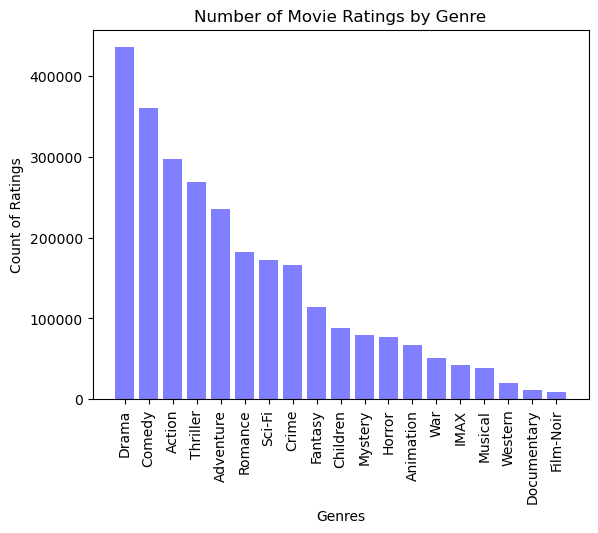

In [21]:
# Get the counts of movies by genre
genre_counts = subset.iloc[:,4:].sum()

#Sort the genre counts in descending order
sorted_counts = genre_counts.sort_values(ascending=False)

# Create a bar chart of movie counts by genre
plt.bar(sorted_counts.index, sorted_counts.values, color='blue', alpha=0.5)

# Set the x-axis label
plt.xlabel('Genres')

# Set the y-axis label
plt.ylabel('Count of Ratings')

# Set the plot title
plt.title('Number of Movie Ratings by Genre')

# Rotate x-axis labels
plt.xticks(rotation=90)

# Display the plot
plt.show()

In [70]:
subset.head()

,User_Id,Movie_Name,Rating,Genre,IMAX,Action,Horror,Thriller,Drama,Crime,...,Animation,Film-Noir,Mystery,Western,Documentary,War,Adventure,Romance,Release_Date,Movie_Id
0,1,Pulp Fiction (1994),5.0,Comedy|Crime|Drama|Thriller,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,1994-01-01,0
1,1,Three Colors: Red (Trois couleurs: Rouge) (1994),3.5,Drama,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1994-01-01,1
2,1,Three Colors: Blue (Trois couleurs: Bleu) (1993),5.0,Drama,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1993-01-01,2
3,1,Underground (1995),5.0,Comedy|Drama|War,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1995-01-01,3
4,1,Singin' in the Rain (1952),3.5,Comedy|Musical|Romance,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1952-01-01,4


We can also visualize the number of unique movies by Genre

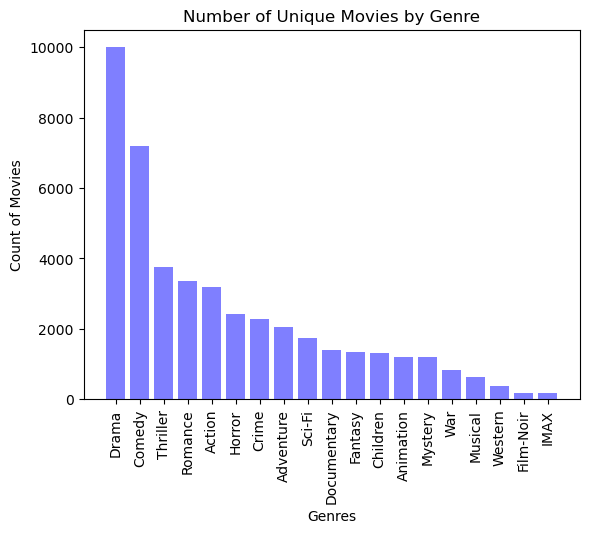

In [22]:
#Create a new copy of the dataset with only unique movies
unique_movies_df = subset.drop_duplicates(subset=["Movie_Name"])

#Get the counts of movies by genre
genre_counts = unique_movies_df.iloc[:,4:].sum()

#Sort the genre counts in descending order
sorted_counts = genre_counts.sort_values(ascending=False)

# Create a bar chart of movie counts by genre
plt.bar(sorted_counts.index, sorted_counts.values, color='blue', alpha=0.5)

# Set the x-axis label
plt.xlabel('Genres')

# Set the y-axis label
plt.ylabel('Count of Movies')

# Set the plot title
plt.title('Number of Unique Movies by Genre')

# Rotate x-axis labels
plt.xticks(rotation=90)

# Display the plot
plt.show()

We can the extract the movie year from the `Movie_Name` column to create a new feature called `Release_Date`.

In [23]:
subset['Release_Date'] = subset['Movie_Name'].str.extract('\((\d{4})\)', expand=True)

In [24]:
subset.head()

,User_Id,Movie_Name,Rating,Genre,IMAX,Action,Horror,Thriller,Drama,Crime,...,Sci-Fi,Animation,Film-Noir,Mystery,Western,Documentary,War,Adventure,Romance,Release_Date
0,1,Pulp Fiction (1994),5.0,Comedy|Crime|Drama|Thriller,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1994
1,1,Three Colors: Red (Trois couleurs: Rouge) (1994),3.5,Drama,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1994
2,1,Three Colors: Blue (Trois couleurs: Bleu) (1993),5.0,Drama,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1993
3,1,Underground (1995),5.0,Comedy|Drama|War,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1995
4,1,Singin' in the Rain (1952),3.5,Comedy|Musical|Romance,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1952


In [25]:
subset.isnull().sum()

User_Id           0
Movie_Name        0
Rating            0
Genre             0
IMAX              0
Action            0
Horror            0
Thriller          0
Drama             0
Crime             0
Musical           0
Comedy            0
Children          0
Fantasy           0
Sci-Fi            0
Animation         0
Film-Noir         0
Mystery           0
Western           0
Documentary       0
War               0
Adventure         0
Romance           0
Release_Date    360
dtype: int64

In [26]:
subset.dropna(subset=['Release_Date'], inplace=True)

In [27]:
subset['Release_Date'] = pd.to_datetime(subset['Release_Date'], format='%Y')

In [28]:
oldest_movie = subset['Release_Date'].min()
latest_movie = subset['Release_Date'].max()

print('Oldest movie: ', oldest_movie)
print('Latest movie: ', latest_movie)

Oldest movie:  1895-01-01 00:00:00
Latest movie:  2019-01-01 00:00:00


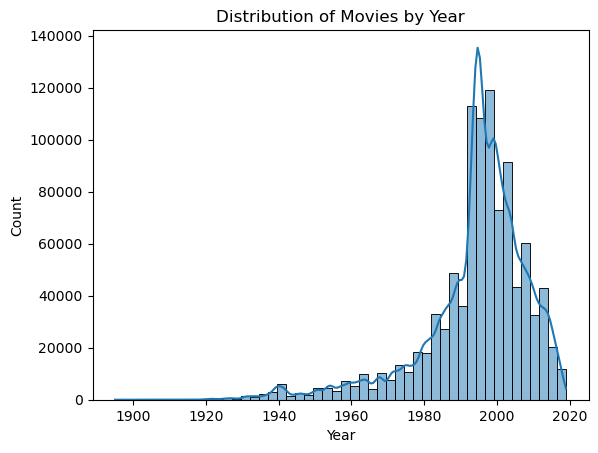

In [29]:
sns.histplot(data=subset, x=subset['Release_Date'].dt.year, kde=True, bins=50)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Distribution of Movies by Year')
plt.show()

## Building and training the model

In [71]:
from surprise import Dataset, Reader

In [73]:
reader = Reader(rating_scale=(0.5, 5))
dataset = Dataset.load_from_df(subset[['User_Id', 'Movie_Id', 'Rating']], reader)

In [74]:
#Split the dataset into training and testing sets
from surprise.model_selection import train_test_split

trainset, testset = train_test_split(dataset, test_size=0.3, random_state=42)

In [75]:
train_ratings = [(user_id, item_id, rating) for (user_id, item_id, rating) in trainset.all_ratings()]
train_df = pd.DataFrame(train_ratings, columns=["User ID", "Movie_ID", "Rating"])
train_df.head(10)

,User ID,Movie_ID,Rating
0,0,0,4.0
1,0,580,5.0
2,0,1007,5.0
3,0,583,5.0
4,0,1184,4.0
5,0,6767,5.0
6,0,517,4.0
7,0,248,5.0
8,0,2189,4.0
9,0,1456,4.0


In [96]:
test_ratings = [(user_id, item_id, rating) for (user_id, item_id, rating) in testset]
test_df = pd.DataFrame(test_ratings, columns=["User ID", "Movie_ID", "Rating"])
test_df.head(10)

,User ID,Movie_ID,Rating
0,1156,957,4.0
1,3490,2135,3.5
2,6188,5012,3.0
3,378,398,3.5
4,2373,1820,5.0
5,3832,3449,2.0
6,2879,948,4.0
7,1205,79,5.0
8,6578,2172,4.0
9,4212,2486,3.0


In [89]:
# Build the rating matrix
from surprise import SVD

algo = SVD(n_factors=100, n_epochs=20, random_state=42)
algo.fit(trainset)

In [90]:
# Predict ratings
predictions = algo.test(testset)

In [91]:
# Evaluate the model
from surprise import accuracy

accuracy.rmse(predictions)
accuracy.mae(predictions)

RMSE: 0.8483
MAE:  0.6475


0.6474540702878174

In [80]:
df_predictions = pd.DataFrame(predictions, columns=['User_Id', 'Movie_Name', 'actual_rating', 'predicted_rating', 'details'])
df_predictions = df_predictions.drop('details', axis=1)

In [81]:
df_predictions.head(10)

,User_Id,Movie_Name,actual_rating,predicted_rating
0,1156,957,4.0,3.995050
1,3490,2135,3.5,4.216010
2,6188,5012,3.0,1.774854
3,378,398,3.5,2.902698
4,2373,1820,5.0,3.957108
5,3832,3449,2.0,3.002170
6,2879,948,4.0,3.884445
7,1205,79,5.0,4.864038
8,6578,2172,4.0,3.644616
9,4212,2486,3.0,3.040738


## Recommending Movies to a User

In [95]:
import random

# Recommend top movies for a user
user_id = 1 # Example user ID
movies = data['Movie_Name'].unique()  # Get all unique movie names

# Create a list of tuples (movie name, predicted rating) for the given user
user_ratings = [(movie, algo.predict(user_id, movie).est) for movie in movies]

# Shuffle the list of recommended movies
random.shuffle(user_ratings)

# Sort the list by predicted rating in descending order
user_ratings.sort(key=lambda x: x[1], reverse=True)

# Print top 10 recommended movies for the user
print(f"Top 10 recommended movies for user {user_id}:")
for i, (movie, rating) in enumerate(user_ratings):
    if i >= 10:
        break
    print(f"{movie} (predicted rating: {rating:.2f})")

Top 10 recommended movies for user 1:
Battle of Algiers, The (La battaglia di Algeri) (1966) (predicted rating: 3.45)
Slipstream (2007) (predicted rating: 3.45)
Women (1965) (predicted rating: 3.45)
Asterix at the Olympic Games (Astérix aux jeux olympiques) (2008) (predicted rating: 3.45)
Evilspeak (1981) (predicted rating: 3.45)
Galaxy Hunter (2004) (predicted rating: 3.45)
Tracker, The (2002) (predicted rating: 3.45)
Into the Storm (2014) (predicted rating: 3.45)
Million Dollar Duck, The (a.k.a. $1,000,000 Duck) (1971) (predicted rating: 3.45)
Sons and Lovers (1960) (predicted rating: 3.45)


### Save the model

In [34]:
import pickle

# Save the model to a file
with open('model.pkl', 'wb') as file:
    pickle.dump(algo, file)

In [35]:
#Load the data

import pickle
# Load the saved model from file
with open('model.pkl', 'rb') as file:
    model = pickle.load(file)

# Make predictions on the new dataset
predictions = []
for index, row in df.iterrows():
    uid = str(row['User_Id'])
    mid = row['Movie_Name']
    pred = model.predict(uid, mid)
    predictions.append(pred)

# Convert predictions to a dataframe
df_predictions = pd.DataFrame(predictions, columns=['uid', 'mid', 'Rating', 'predicted_rating', 'details'])

df_predictions.head(10)